# Arboles Aleatorios 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Vamos a utilizar como dataset un Pima Indian Diabetes Disponible en https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [3]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Analisis Exploratorio Inicial

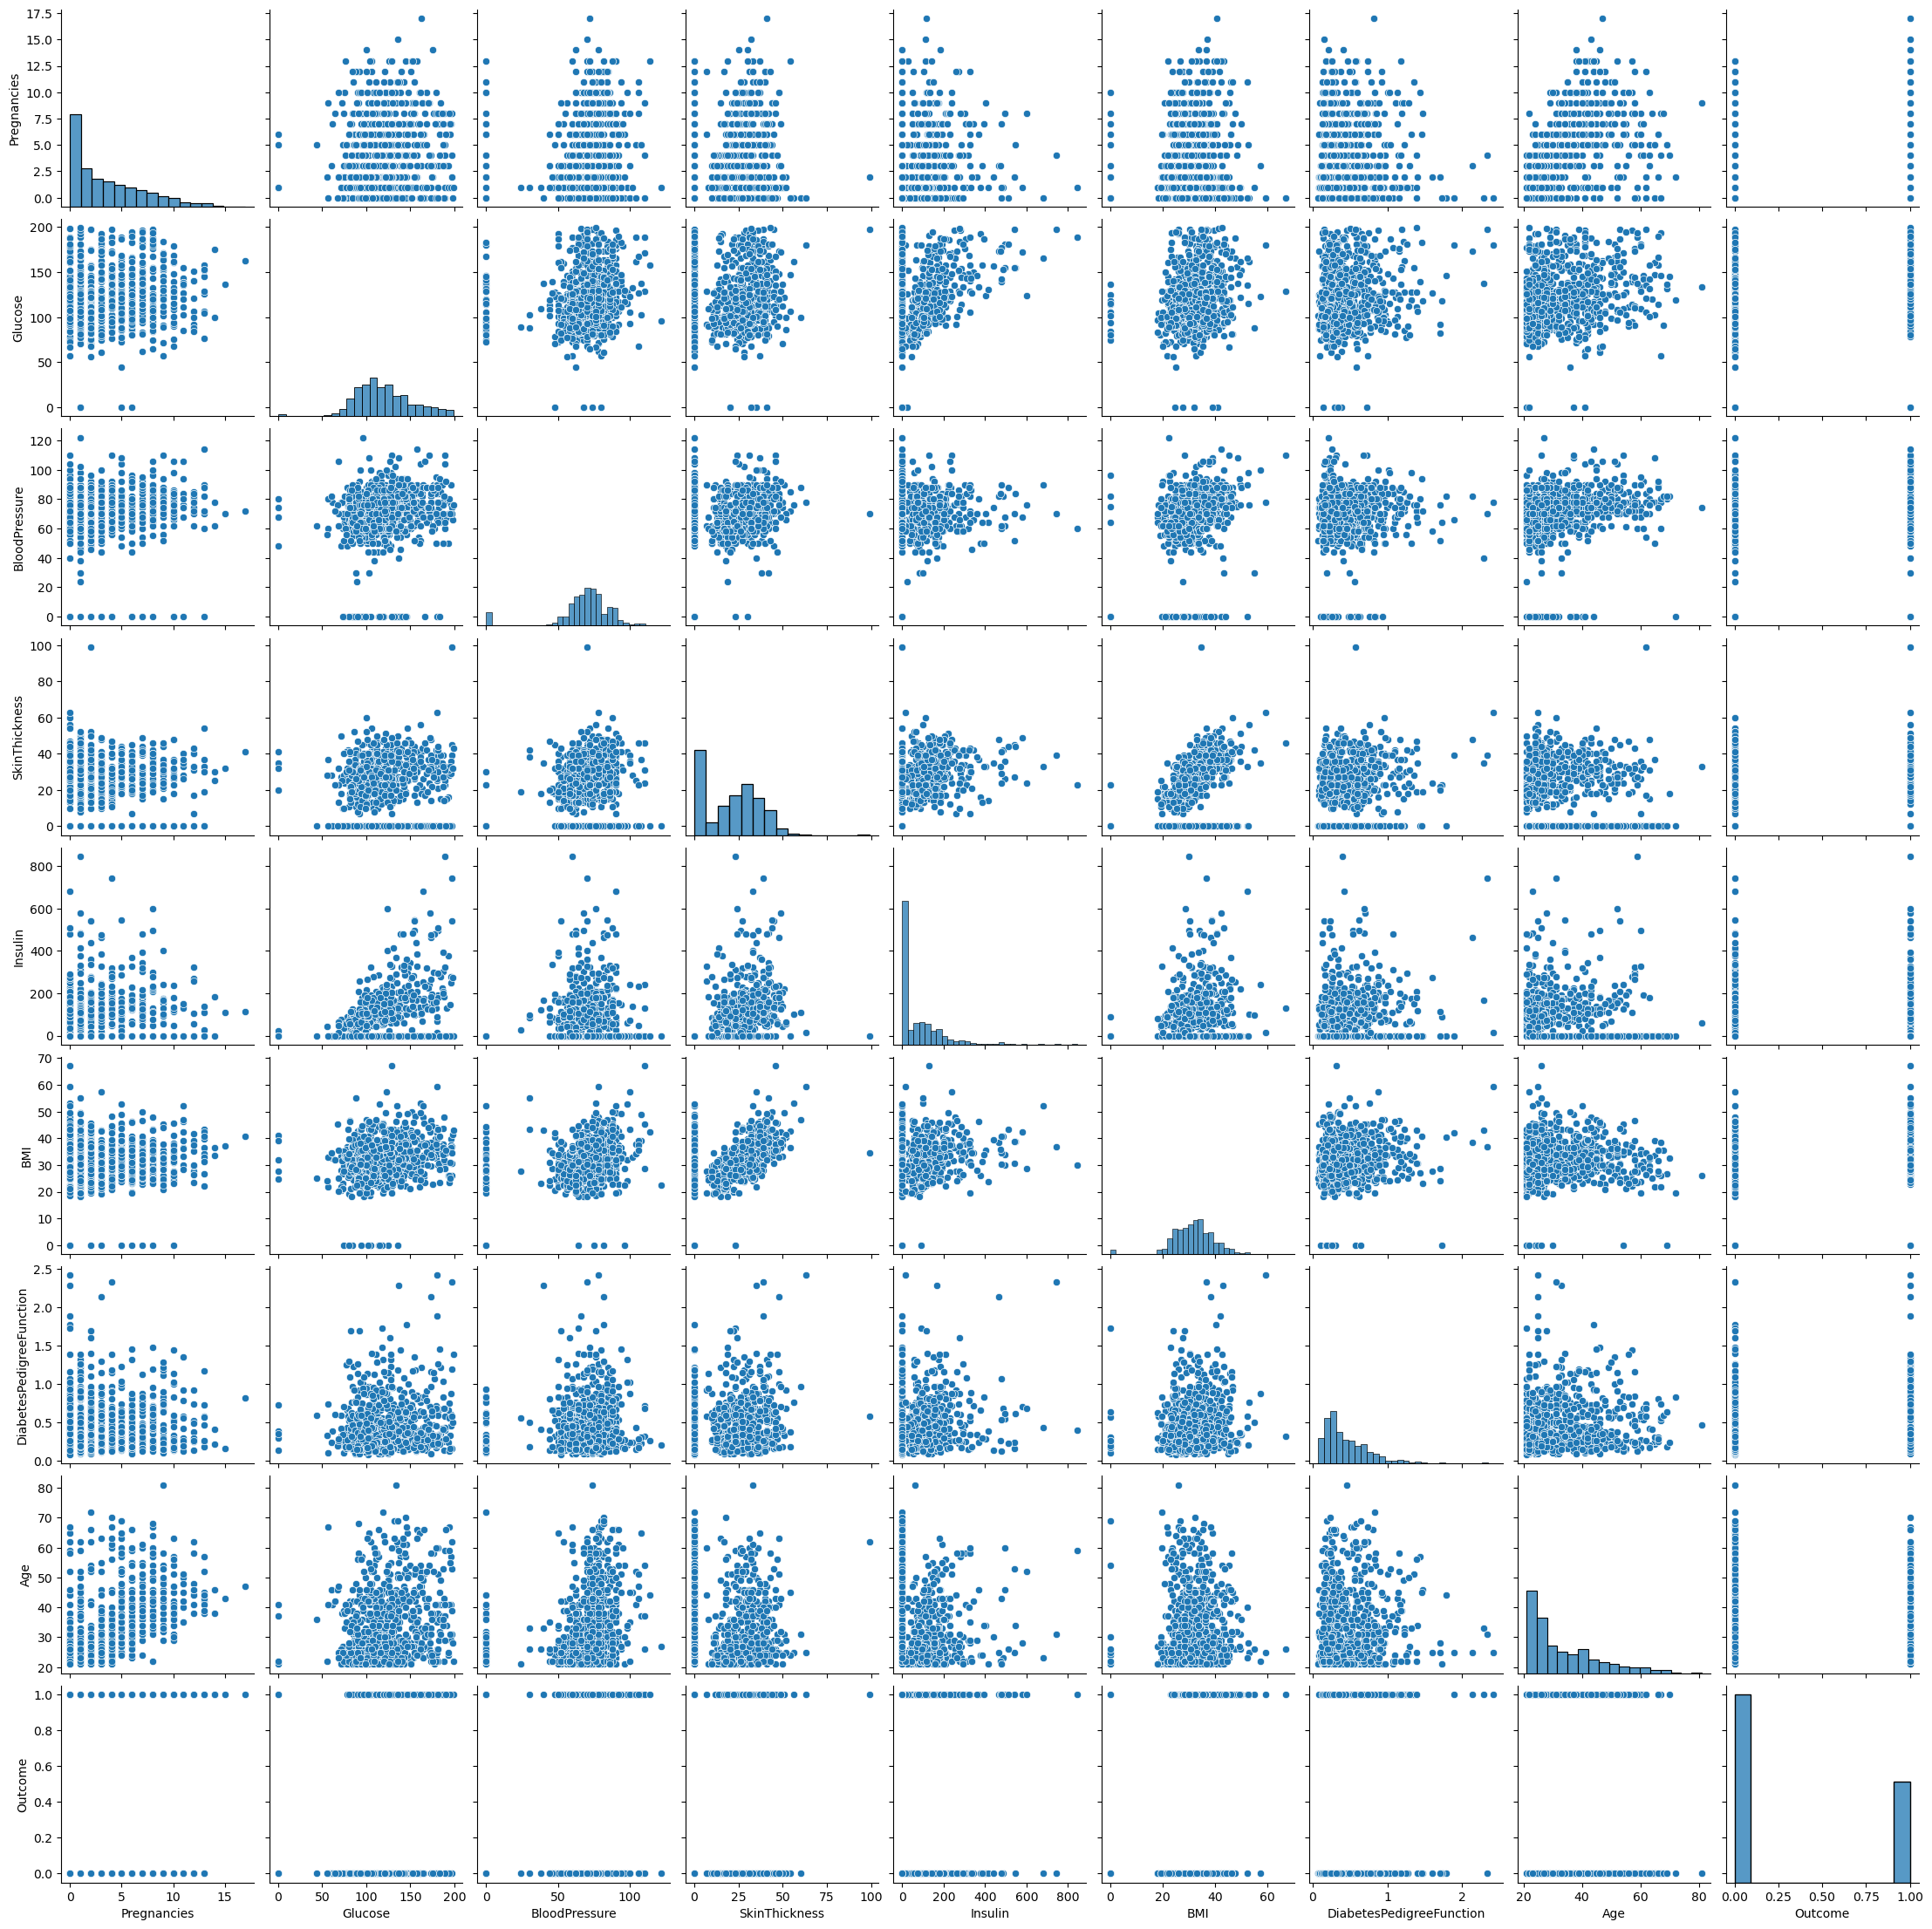

In [5]:
sns.pairplot(df)

In [16]:
df=df[df['BloodPressure']>0]
df=df[df['BMI']>0]
df=df[df['Glucose']>0]


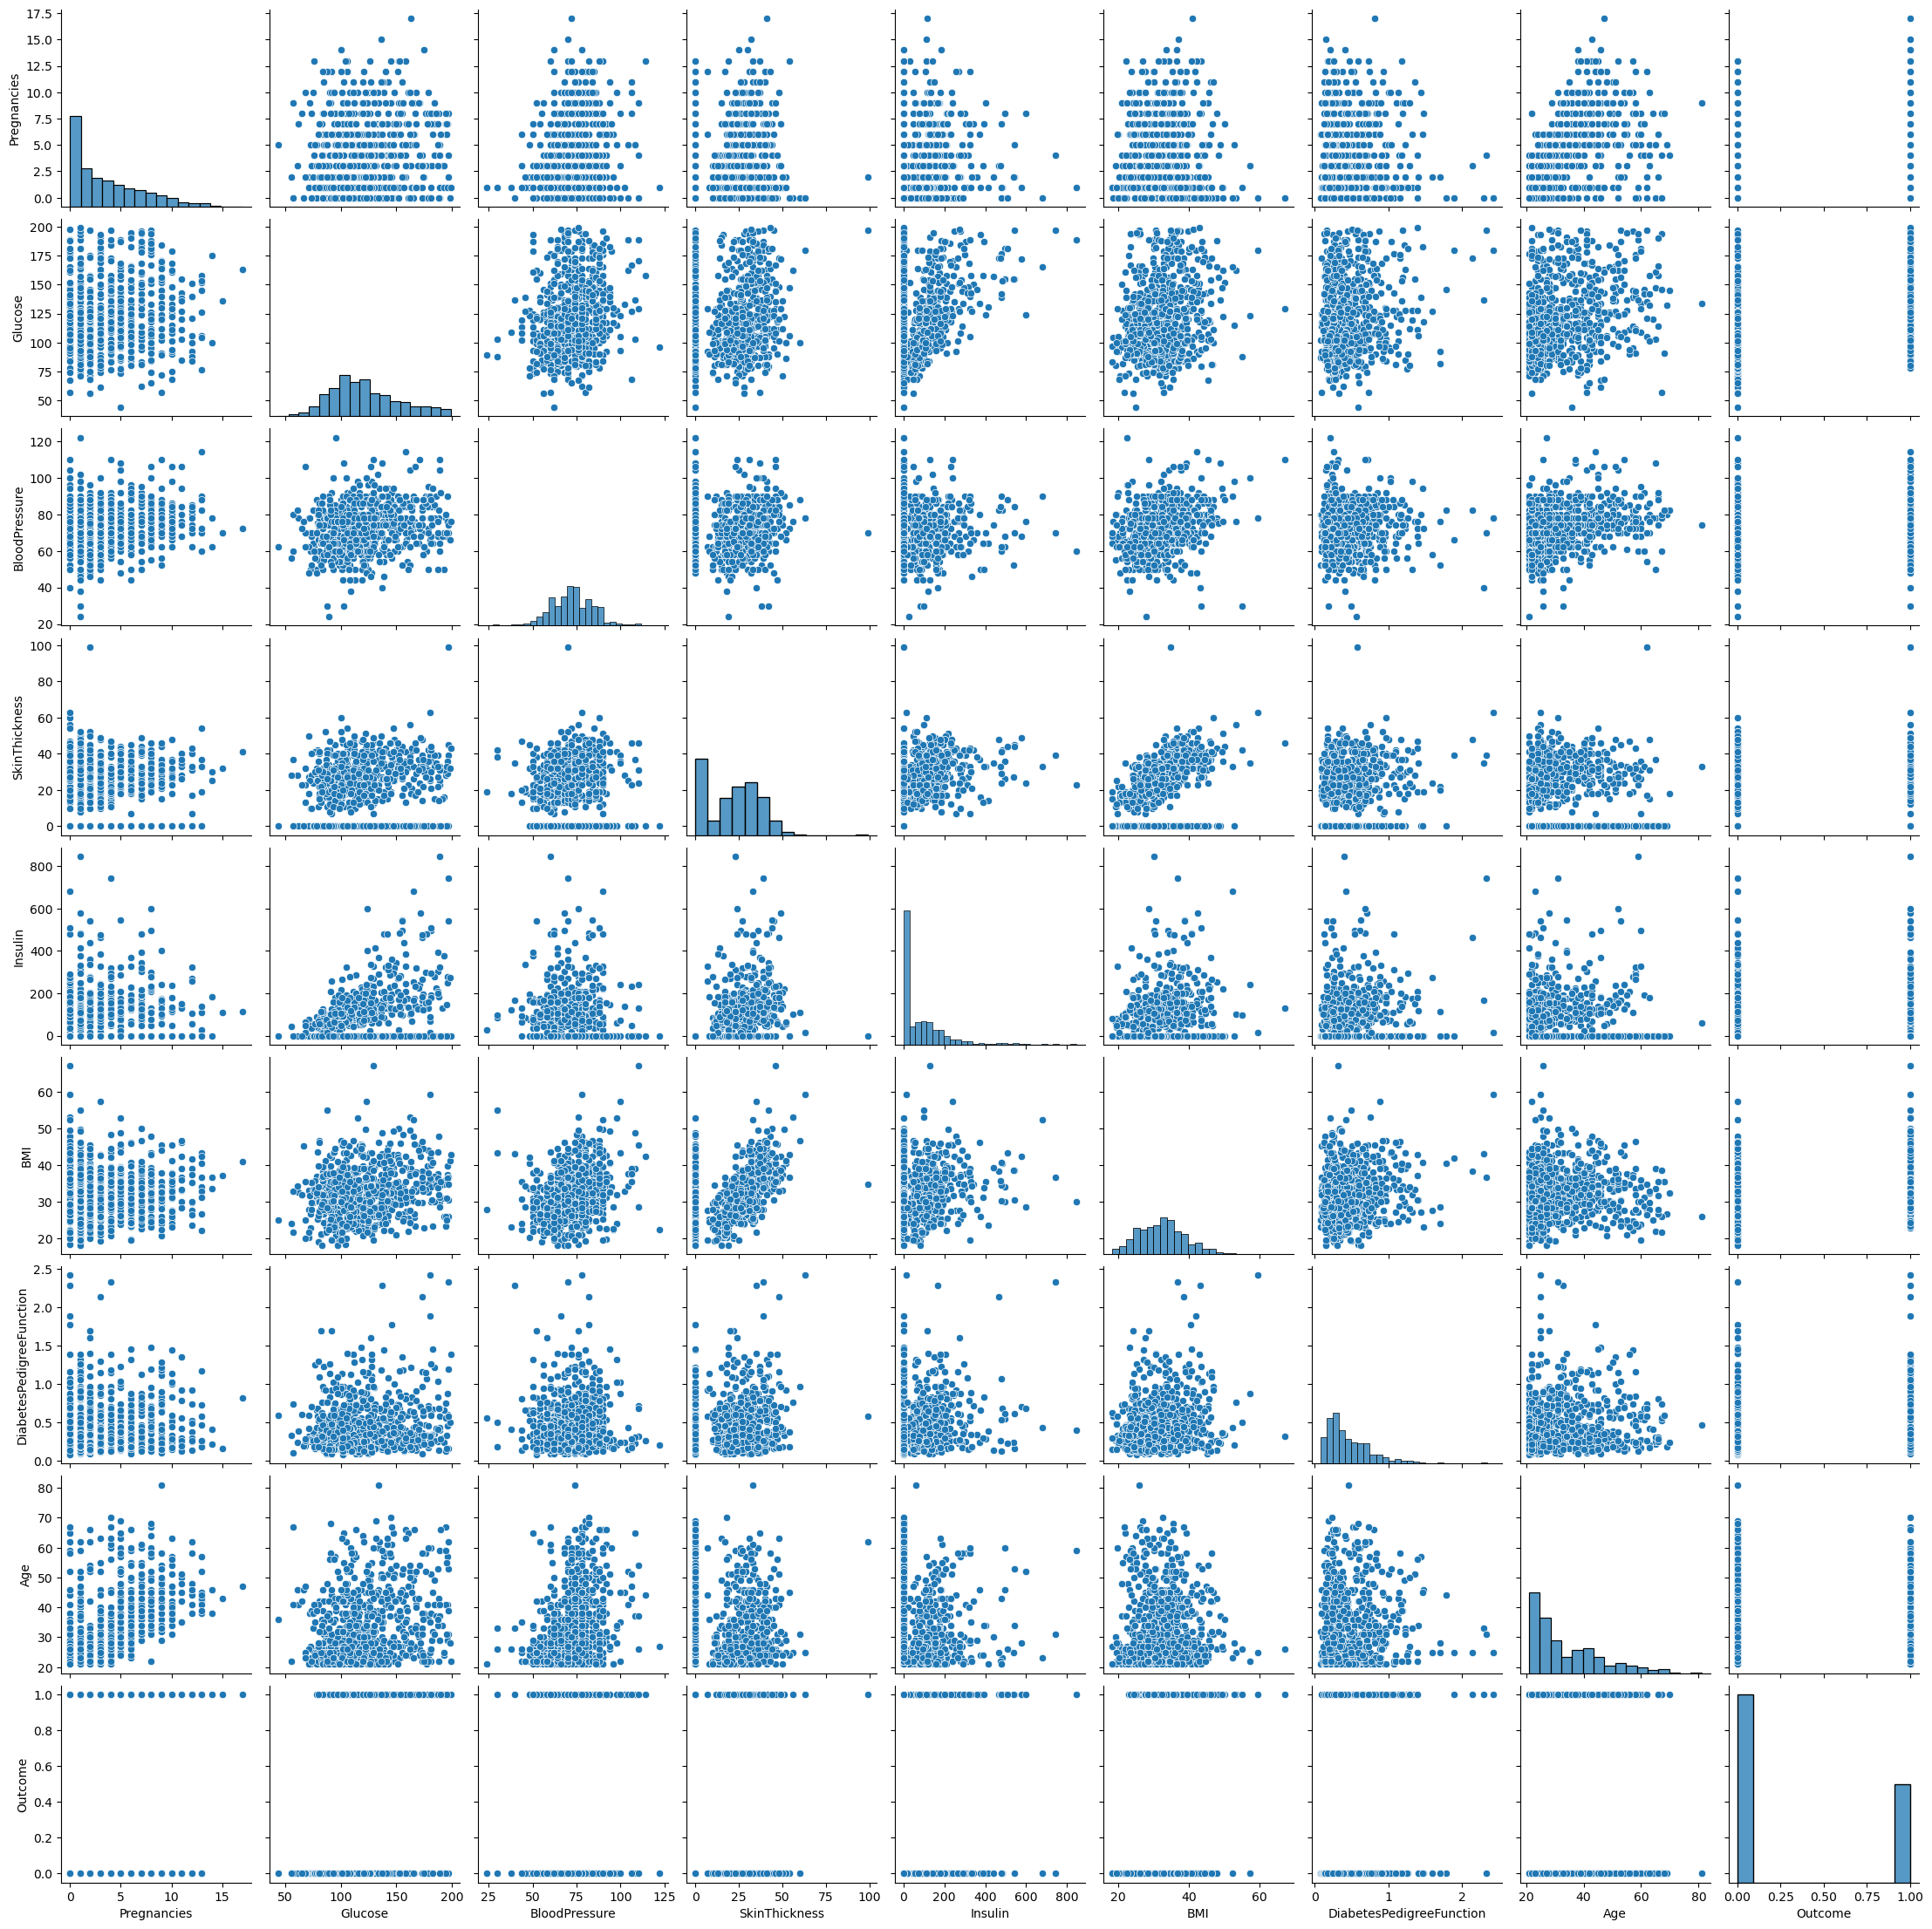

In [17]:
sns.pairplot(df)

## Entrenando nuestro bosque aleatorio 

In [18]:
X=df.drop(['Outcome'],axis='columns')
y=df['Outcome']

### Importar las Librerias Necesarias para realizar el entrenamiento 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
## Separamos usando criterio de 70/30

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=83)

### Creamos el Modelo 

In [22]:
Rf=RandomForestClassifier(n_estimators=15,max_depth=6,random_state=6)

## Entrenamiento del Modelo 

In [23]:
Rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=15, random_state=6)

### Evaluación del Modelo 

In [31]:
y_pred_train=Rf.predict(x_train)
y_pred_test=Rf.predict(x_test)

from sklearn.metrics import accuracy_score

print(f'El Accuracy en Train fue : {accuracy_score(y_train,y_pred_train):.3f}')
print(f'El Accuracy en Test fue : {accuracy_score(y_test,y_pred_test):.3f}')

El Accuracy en Train fue : 0.897
El Accuracy en Test fue : 0.748


## Revisemos la Importancia de las caracteristicas 

In [27]:
feature_importances_df=pd.DataFrame(
    {'Feature':X.columns, 'Importance':Rf.feature_importances_}).sort_values('Importance',ascending=False)
feature_importances_df

,Feature,Importance
1,Glucose,0.349944
5,BMI,0.171415
7,Age,0.140548
6,DiabetesPedigreeFunction,0.127098
0,Pregnancies,0.063888
2,BloodPressure,0.062066
4,Insulin,0.053477
3,SkinThickness,0.031563


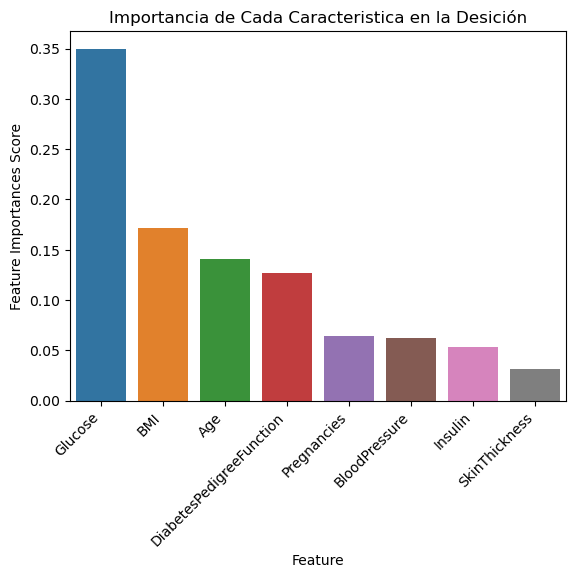

In [30]:
sns.barplot(x=feature_importances_df.Feature,y=feature_importances_df.Importance)
plt.xlabel('Feature')
plt.ylabel('Feature Importances Score')
plt.title('Importancia de Cada Caracteristica en la Desición')
plt.xticks(rotation=45,horizontalalignment='right')
plt.show()

### Evaluando Los parametros de Profundidad y Numero de Arboles en Nuestro Bosque Aleatorio 

In [32]:
accu_train=[]
accu_test=[]
accu_rap=[]

for n_trees in range(1,25,1):
    Rf=RandomForestClassifier(n_estimators=n_trees,random_state=6)
    Rf.fit(x_train,y_train) 
    y_pred_train=Rf.predict(x_train)
    y_pred_test=Rf.predict(x_test)
    accu_train.append(accuracy_score(y_train,y_pred_train))
    accu_test.append(accuracy_score(y_test,y_pred_test))
    accu_rap.append(accuracy_score(y_test,y_pred_test)/accuracy_score(y_train,y_pred_train))


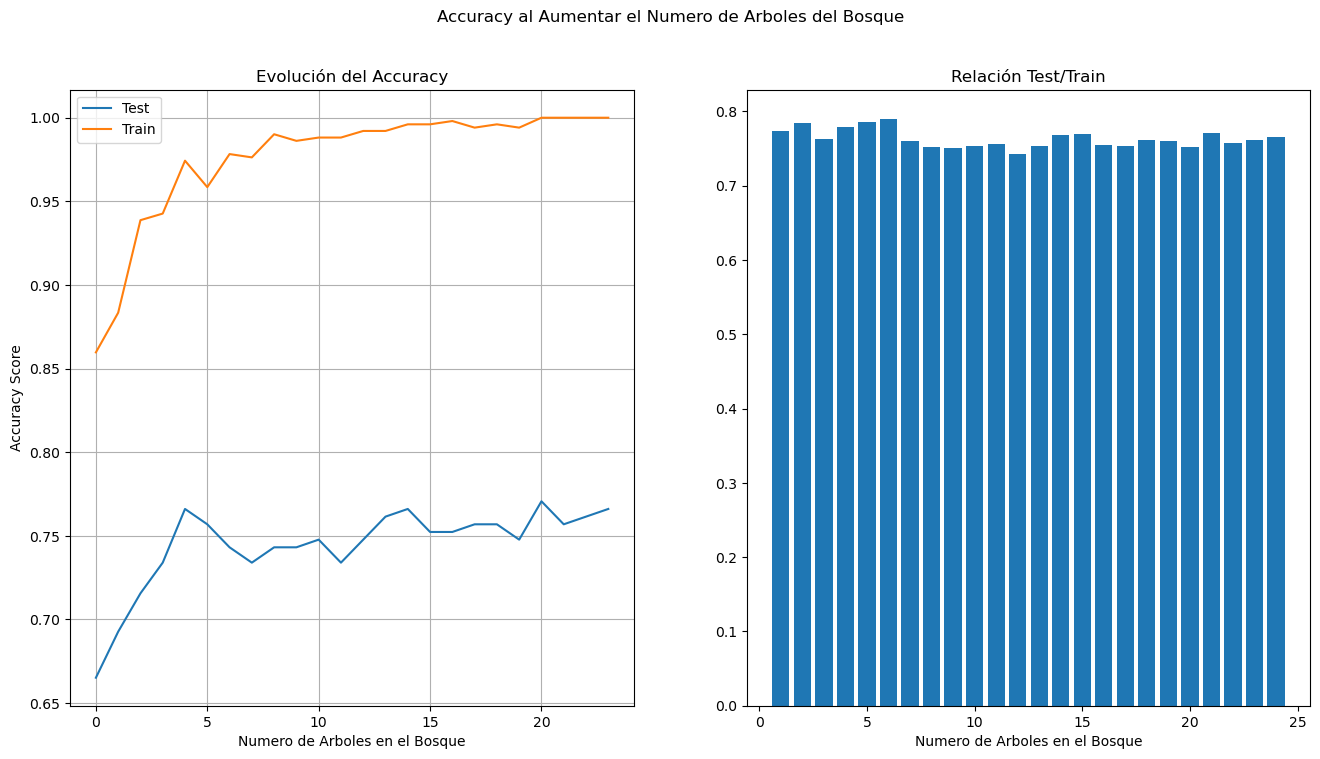

In [39]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
fig.suptitle('Accuracy al Aumentar el Numero de Arboles del Bosque')
ax1.plot(accu_test)
ax1.plot(accu_train)
ax1.set_xlabel('Numero de Arboles en el Bosque')
ax1.set_ylabel('Accuracy Score')
ax1.set_title('Evolución del Accuracy')
ax1.legend(['Test','Train'])
ax1.grid()
ax2.bar(x=range(1,25),height=accu_rap)
ax2.set_xlabel('Numero de Arboles en el Bosque')
ax2.set_title('Relación Test/Train')
plt.show()


In [40]:
accu_train=[]
accu_test=[]
accu_rap=[]

for depth in range(1,25,1):
    Rf=RandomForestClassifier(n_estimators=10,max_depth=depth,random_state=6)
    Rf.fit(x_train,y_train) 
    y_pred_train=Rf.predict(x_train)
    y_pred_test=Rf.predict(x_test)
    accu_train.append(accuracy_score(y_train,y_pred_train))
    accu_test.append(accuracy_score(y_test,y_pred_test))
    accu_rap.append(accuracy_score(y_test,y_pred_test)/accuracy_score(y_train,y_pred_train))

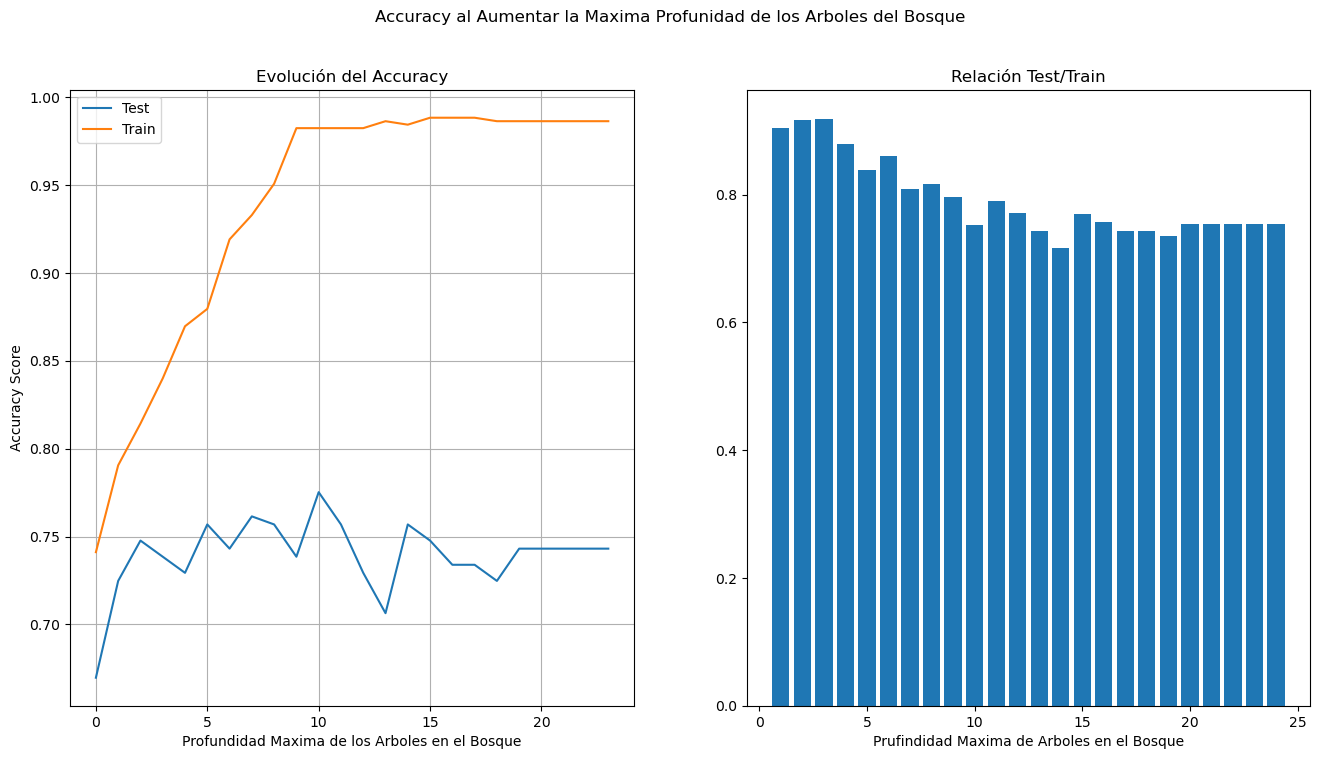

In [41]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
fig.suptitle('Accuracy al Aumentar la Maxima Profunidad de los Arboles del Bosque')
ax1.plot(accu_test)
ax1.plot(accu_train)
ax1.set_xlabel('Profundidad Maxima de los Arboles en el Bosque')
ax1.set_ylabel('Accuracy Score')
ax1.set_title('Evolución del Accuracy')
ax1.legend(['Test','Train'])
ax1.grid()
ax2.bar(x=range(1,25),height=accu_rap)
ax2.set_xlabel('Prufindidad Maxima de Arboles en el Bosque')
ax2.set_title('Relación Test/Train')
plt.show()

In [43]:
Rf=RandomForestClassifier(n_estimators=10,max_depth=3,random_state=6)
Rf.fit(x_train,y_train)

print(f'El Accuracy en Train fue : {accuracy_score(y_train,y_pred_train):.3f}')
print(f'El Accuracy en Test fue : {accuracy_score(y_test,y_pred_test):.3f}')

El Accuracy en Train fue : 0.986
El Accuracy en Test fue : 0.743
